# Prepare interpolated freeboard dataset for ANN, LSTM

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# LSTM Model

## Prepare the Data Set for LSTM

In [5]:
dataset_accu = pd.read_csv("ATL03_labeled_data/ATL03_ow_labeled_10m_5km_corrected_new_sea_surface_LSTM_ann_prepared.csv")
dataset_accu

,Unnamed: 0,label,h_cor_mean-2,height_sd-2,pcnth_mean-2,pcnt_mean-2,h_cor_mean-1,height_sd-1,pcnth_mean-1,pcnt_mean-1,...,pcnt_mean0,h_cor_mean1,height_sd1,pcnth_mean1,pcnt_mean1,h_cor_mean2,height_sd2,pcnth_mean2,pcnt_mean2,track
0,0,2.0,0.637049,0.082355,3.000000,4.500000,0.679456,0.047031,1.666667,3.666667,...,4.000000,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,gt1r
1,1,2.0,0.679456,0.047031,1.666667,3.666667,0.723813,0.000000,1.000000,4.000000,...,2.000000,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,gt1r
2,2,2.0,0.723813,0.000000,1.000000,4.000000,0.729230,0.000000,1.000000,2.000000,...,3.500000,0.726380,0.019368,1.666667,5.000000,0.545018,0.103501,3.333333,5.000000,gt1r
3,3,2.0,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,...,5.000000,0.545018,0.103501,3.333333,5.000000,0.611392,0.126779,3.000000,5.571429,gt1r
4,4,2.0,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,...,5.000000,0.611392,0.126779,3.000000,5.571429,0.557143,0.127518,2.500000,4.250000,gt1r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303680,20526,2.0,1.248831,0.270227,5.133333,7.000000,1.410490,0.299490,4.636364,7.000000,...,6.000000,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,gt2r
1303681,20527,2.0,1.410490,0.299490,4.636364,7.000000,1.521043,0.192664,5.375000,6.000000,...,10.636364,1.647001,0.246471,4.555556,7.000000,1.533705,0.247331,9.000000,11.000000,gt2r
1303682,20528,2.0,1.521043,0.192664,5.375000,6.000000,1.517701,0.244665,7.727273,10.636364,...,7.000000,1.533705,0.247331,9.000000,11.000000,1.600905,0.195343,8.583333,11.416667,gt2r
1303683,20529,2.0,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,...,11.000000,1.600905,0.195343,8.583333,11.416667,1.428459,0.242420,7.000000,11.157895,gt2r


In [6]:
# separate features and labels
lstm_features = dataset_accu.copy()
lstm_labels = lstm_features.pop('label')
lstm_track = lstm_features.pop('track')
lstm_features

,Unnamed: 0,h_cor_mean-2,height_sd-2,pcnth_mean-2,pcnt_mean-2,h_cor_mean-1,height_sd-1,pcnth_mean-1,pcnt_mean-1,h_cor_mean0,...,pcnth_mean0,pcnt_mean0,h_cor_mean1,height_sd1,pcnth_mean1,pcnt_mean1,h_cor_mean2,height_sd2,pcnth_mean2,pcnt_mean2
0,0,0.637049,0.082355,3.000000,4.500000,0.679456,0.047031,1.666667,3.666667,0.723813,...,1.000000,4.000000,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000
1,1,0.679456,0.047031,1.666667,3.666667,0.723813,0.000000,1.000000,4.000000,0.729230,...,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000
2,2,0.723813,0.000000,1.000000,4.000000,0.729230,0.000000,1.000000,2.000000,0.610320,...,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,0.545018,0.103501,3.333333,5.000000
3,3,0.729230,0.000000,1.000000,2.000000,0.610320,0.067461,2.500000,3.500000,0.726380,...,1.666667,5.000000,0.545018,0.103501,3.333333,5.000000,0.611392,0.126779,3.000000,5.571429
4,4,0.610320,0.067461,2.500000,3.500000,0.726380,0.019368,1.666667,5.000000,0.545018,...,3.333333,5.000000,0.611392,0.126779,3.000000,5.571429,0.557143,0.127518,2.500000,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303680,20526,1.248831,0.270227,5.133333,7.000000,1.410490,0.299490,4.636364,7.000000,1.521043,...,5.375000,6.000000,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000
1303681,20527,1.410490,0.299490,4.636364,7.000000,1.521043,0.192664,5.375000,6.000000,1.517701,...,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,1.533705,0.247331,9.000000,11.000000
1303682,20528,1.521043,0.192664,5.375000,6.000000,1.517701,0.244665,7.727273,10.636364,1.647001,...,4.555556,7.000000,1.533705,0.247331,9.000000,11.000000,1.600905,0.195343,8.583333,11.416667
1303683,20529,1.517701,0.244665,7.727273,10.636364,1.647001,0.246471,4.555556,7.000000,1.533705,...,9.000000,11.000000,1.600905,0.195343,8.583333,11.416667,1.428459,0.242420,7.000000,11.157895


In [7]:
# normalized the features
def norm(x, M = 1, m = 0):
    # Normalize the input data
    # output = (x-m)/(M-m) # Max-min normalization
    output = (x-x.mean())/(M-x.std()) # mean-std normalization
    return output

norm_lstm_features = norm(lstm_features)
norm_lstm_features

,Unnamed: 0,h_cor_mean-2,height_sd-2,pcnth_mean-2,pcnt_mean-2,h_cor_mean-1,height_sd-1,pcnth_mean-1,pcnt_mean-1,h_cor_mean0,...,pcnth_mean0,pcnt_mean0,h_cor_mean1,height_sd1,pcnth_mean1,pcnt_mean1,h_cor_mean2,height_sd2,pcnth_mean2,pcnt_mean2
0,1.442981,-0.671437,-0.102502,2.736370,1.408475,-0.589916,-0.141608,3.710948,1.550748,-0.504558,...,4.197687,1.493985,-0.494107,-0.193669,4.194785,1.834964,-0.722968,-0.119093,3.098521,1.579172
1,1.442954,-0.589732,-0.141462,3.704478,1.550465,-0.504472,-0.193515,4.195795,1.493947,-0.494123,...,4.197687,1.834788,-0.723166,-0.119151,3.104220,1.579351,-0.499366,-0.172216,3.703283,1.323594
2,1.442927,-0.504271,-0.193333,4.188531,1.493669,-0.494036,-0.193515,4.195795,1.834751,-0.723170,...,3.106335,1.579186,-0.499597,-0.172275,3.710090,1.323737,-0.848781,-0.079285,2.493759,1.323594
3,1.442899,-0.493833,-0.193333,4.188531,1.834444,-0.723094,-0.119060,3.104889,1.579148,-0.499613,...,3.712641,1.323583,-0.848960,-0.079342,2.498351,1.323737,-0.720903,-0.053572,2.735664,1.226232
4,1.442872,-0.722935,-0.118928,3.099410,1.578863,-0.499526,-0.172139,3.710948,1.323545,-0.848956,...,2.500029,1.323583,-0.721102,-0.053629,2.740699,1.226360,-0.825419,-0.052756,3.098521,1.451383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303680,0.881603,0.507273,0.104706,1.187398,0.982505,0.818282,0.137024,1.551174,0.982741,1.031080,...,1.014578,1.153181,1.024745,0.076587,-0.696232,0.363250,1.274312,0.078637,1.606775,0.982825
1303681,0.881576,0.818739,0.136981,1.548238,0.982505,1.031241,0.019122,1.013986,1.153143,1.024642,...,-0.696860,0.363137,1.273820,0.078582,1.609743,0.982919,1.056034,0.079586,-1.618622,0.301286
1303682,0.881548,1.031739,0.019160,1.011928,1.152893,1.024803,0.076515,-0.696753,0.363097,1.273703,...,1.610779,0.982779,1.055574,0.079532,-1.621560,0.301283,1.185504,0.022162,-1.316241,0.230292
1303683,0.881521,1.025300,0.076513,-0.696012,0.362913,1.273876,0.078508,1.609943,0.982741,1.055470,...,-1.622855,0.301172,1.185025,0.022106,-1.318625,0.230279,0.853267,0.074162,-0.167193,0.274383


In [8]:
# convert the data to LSTM format
np_array = norm_lstm_features.to_numpy()
print(np_array.shape)
new_lstm_features = []
for row in np_array:
  # construct features array
  point_r2 =  row[1:5]
  point_r1 =  row[5:9]
  point_0 = row[9:13]
  point_l1 = row[13:17]
  point_l2 = row[17:21]
  new_lstm_features.append([point_r2, point_r1, point_0, point_l1, point_l2])

new_lstm_features = np.array(new_lstm_features)
print(new_lstm_features.shape) # the X array inputshape = [5,4]
print(new_lstm_features) 

(1303685, 21)
(1303685, 5, 4)
[[[-0.67143746 -0.10250218  2.73636997  1.40847474]
  [-0.58991595 -0.14160828  3.71094754  1.55074785]
  [-0.50455837 -0.19369612  4.19768656  1.49398483]
  [-0.49410709 -0.19366929  4.19478492  1.83496411]
  [-0.72296826 -0.11909316  3.09852128  1.57917154]]

 [[-0.5897316  -0.14146168  3.70447761  1.55046465]
  [-0.50447172 -0.19351503  4.19579464  1.49394715]
  [-0.49412349 -0.19369612  4.19768656  1.83478843]
  [-0.72316623 -0.11915148  3.10422027  1.57935058]
  [-0.49936636 -0.17221565  3.70328322  1.32359438]]

 [[-0.50427082 -0.19333318  4.18853144  1.49366869]
  [-0.49403634 -0.19351503  4.19579464  1.83475135]
  [-0.7231696  -0.11917742  3.10633505  1.57918573]
  [-0.49959729 -0.17227509  3.71008952  1.32373704]
  [-0.84878057 -0.07928452  2.49375935  1.32359438]]

 ...

 [[ 1.03173906  0.01915984  1.01192822  1.1528929 ]
  [ 1.02480309  0.07651463 -0.69675334  0.36309686]
  [ 1.27370281  0.07855889  1.61077929  0.98277943]
  [ 1.05557405  0.0795

In [9]:
# covert labels to multi-class
def convert_to_multi_calss(data):
  new_labels = []
  for label in data:
    #print(row)
    if label == 0:
      new_labels.append([1,0,0]) 
    elif label == 1:
      new_labels.append([0,1,0])
    elif label == 2:
      new_labels.append([0,0,1])
    else:
      print("Error: invalid label:" + label)
      return 
  return np.array(new_labels)

lstm_labels_multi = convert_to_multi_calss(lstm_labels)
lstm_labels_multi

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

## Generating Training, Validation and Testing Data sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_lstm_features, lstm_labels_multi, 
                                                    test_size =0.2, shuffle=True, random_state=20)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size =0.25, shuffle=True, random_state=20)

print("The train set size is {0:d}, validation set size is {1:d}, "
      "and testing set size is {2:d}".format(len(X_train), len(X_val), len(X_test)))

print("The shapes of training data are", X_train.shape, Y_train.shape)

print("The shapes of testing data are", X_test.shape, Y_test.shape)

print("The shapes of testing data are", X_val.shape, Y_val.shape)

The train set size is 782211, validation set size is 260737, and testing set size is 260737
The shapes of training data are (782211, 5, 4) (782211, 3)
The shapes of testing data are (260737, 5, 4) (260737, 3)
The shapes of testing data are (260737, 5, 4) (260737, 3)


## Evaluation Metric

In [11]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

2024-07-04 09:41:55.859081: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Construct the LSTM model

Please adjust the following parameters
1. The number of units: from 8 to 256, with a step of 16
2. The activation function: tanh, sigmoid, relu, selu, elu, 
3. Dropout form 0 to 0.6, with a step of 0.1
4. Loss: "mse", "mape", keras.losses.SparseCategoricalCrossentropy(from_logits=True), tf.keras.losses.CategoricalCrossentropy(from_logits=True), tf.keras.losses.BinaryCrossentropy(from_logits=True)

For each configuration,
Please record: train accuracy, test accuracy, train time and test time

Please plot the result for each configuration.

Finally, please try all possible configurations to check if it is possible to drag it to 99% accurate. It is better to write a program to automate this process.

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
#from keras.layers import CuDNNLSTM
from keras.layers import Dense
import tensorflow as tf

units = 32
#loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
loss_func = tf.keras.losses.CategoricalCrossentropy(from_logits=True)


model = Sequential()
model.add(LSTM(units, activation='elu', batch_input_shape=(None, 5, 4)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='elu'))
model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


sample_weight=np.array([0.10, 0.35, 0.65])

# Define the optimizer with a specific learning rate
learning_rate = 0.005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

focal_loss = tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=sample_weight,
    gamma=2.0,
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_focal_crossentropy'
)
model.compile(optimizer=optimizer, loss=focal_loss, metrics=['accuracy', f1_m,precision_m, recall_m])
#
# model = Sequential()
# model.add(CuDNNLSTM(units, batch_input_shape=(None, 5, 4)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='elu'))
# model.add(Dropout(0.2))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fit model lstm 240
import time
begin = time.time()
history = model.fit(X_train, Y_train, epochs=9, validation_data=(X_val, Y_val), verbose=1)

end = time.time()
print(f"The training time is {end - begin} seconds.")



Epoch 1/9


2024-07-04 09:42:20.491100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-07-04 09:42:20.525570: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8ab87671e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-04 09:42:20.525617: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-07-04 09:42:20.525624: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-07-04 09:42:20.525629: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-07-04 09:42:20.525635: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-07-04 0

24445/24445 [==============================] - 205s 8ms/step - loss: 0.0509 - accuracy: 0.8610 - f1_m: 0.7709 - precision_m: 0.9093 - recall_m: 0.6765 - val_loss: 0.0513 - val_accuracy: 0.8334 - val_f1_m: 0.8012 - val_precision_m: 0.8944 - val_recall_m: 0.7280
Epoch 2/9
24445/24445 [==============================] - 201s 8ms/step - loss: 0.0498 - accuracy: 0.8608 - f1_m: 0.7871 - precision_m: 0.9088 - recall_m: 0.6988 - val_loss: 0.0491 - val_accuracy: 0.8569 - val_f1_m: 0.8177 - val_precision_m: 0.9027 - val_recall_m: 0.7494
Epoch 3/9
24445/24445 [==============================] - 204s 8ms/step - loss: 0.0495 - accuracy: 0.8599 - f1_m: 0.7897 - precision_m: 0.9087 - recall_m: 0.7030 - val_loss: 0.0488 - val_accuracy: 0.8551 - val_f1_m: 0.7942 - val_precision_m: 0.9109 - val_recall_m: 0.7068
Epoch 4/9
24445/24445 [==============================] - 207s 8ms/step - loss: 0.0493 - accuracy: 0.8600 - f1_m: 0.7912 - precision_m: 0.9085 - recall_m: 0.7052 - val_loss: 0.0494 - val_accuracy: 0

8149/8149 [==============================] - 19s 2ms/step - loss: 0.0495 - accuracy: 0.8698 - f1_m: 0.8352 - precision_m: 0.9131 - recall_m: 0.7716
The testing time is 19.429653644561768 seconds.


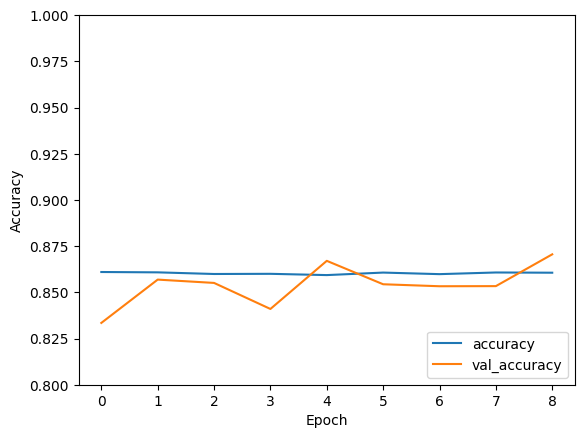

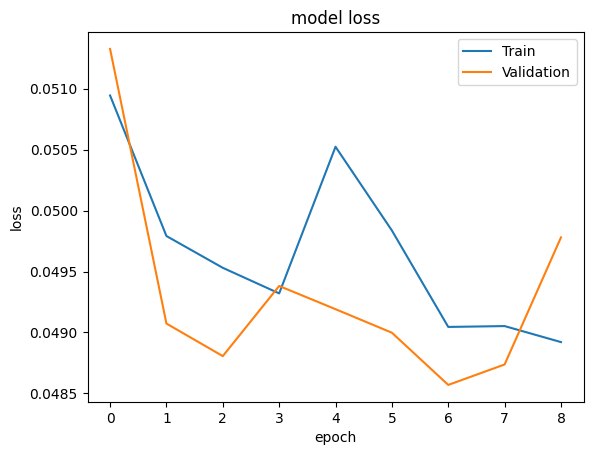

In [14]:
import matplotlib.pyplot as plt
# test the model
begin = time.time()
test_loss, test_acc, test_f1, test_precision, test_recall = model.evaluate(X_test,  Y_test, verbose=1)
end = time.time()
print(f"The testing time is {end - begin} seconds.")
# Check learning curve
# show the history of the model training
# the accuracy of the train and validation for each epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()